Linear Threshold Unit (LTU)

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron 

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)  # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


Perceptron Multicouche (PMC)

In [2]:
import tensorflow as tf

# Chargement des données
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

2025-01-26 17:43:32.938678: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 17:43:33.042435: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 17:43:33.047852: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-26 17:43:35.210567: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


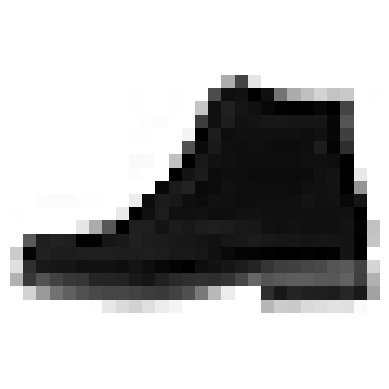

In [3]:
from matplotlib import pyplot as plt

plt.imshow(X_train[42], cmap="binary")
plt.axis('off')
plt.show()

In [4]:
tf.random.set_seed(42)  # Pour la reproductibilité, même poids initiaux

model = tf.keras.Sequential([  # Modèle séquentiel où chaque couche est connectée à la précédente
    tf.keras.layers.Flatten(input_shape=[28, 28]),  # Aplatissement des images 28x28 en un vecteur de 784 éléments
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


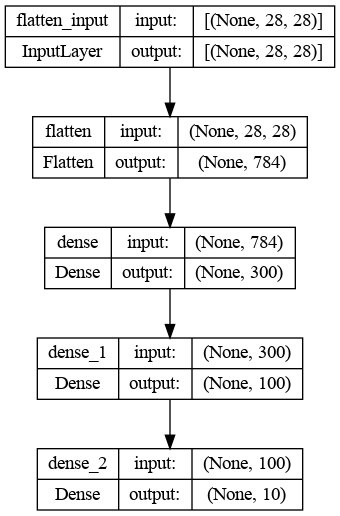

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [7]:
model.layers

In [10]:
hidden1 = model.layers[1]
hidden2 = model.layers[2]

weights1, biases1 = hidden1.get_weights()
weights2, biases2 = hidden2.get_weights()

weights1.shape

(784, 300)

In [11]:
weights2.shape

(300, 100)

In [12]:
biases1 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
biases2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [16]:
# Compiler le modèle
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [17]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2025-01-26 17:53:13.495340: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 6s 3ms/step - loss: 0.7139 - accuracy: 0.7660 - val_loss: 0.5044 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4860 - accuracy: 0.8314 - val_loss: 0.4645 - val_accuracy: 0.8314
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4415 - accuracy: 0.8444 - val_loss: 0.4265 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4172 - accuracy: 0.8544 - val_loss: 0.3985 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3968 - accuracy: 0.8609 - val_loss: 0.3988 - val_accuracy: 0.8582
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3803 - accuracy: 0.8664 - val_loss: 0.4034 - val_accuracy: 0.8602
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3683 - accuracy: 0.8691 - val_loss: 0.3757 - val_accuracy: 0.8656
Epo

In [18]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [22]:
import os

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure keras_learning_curves_plot


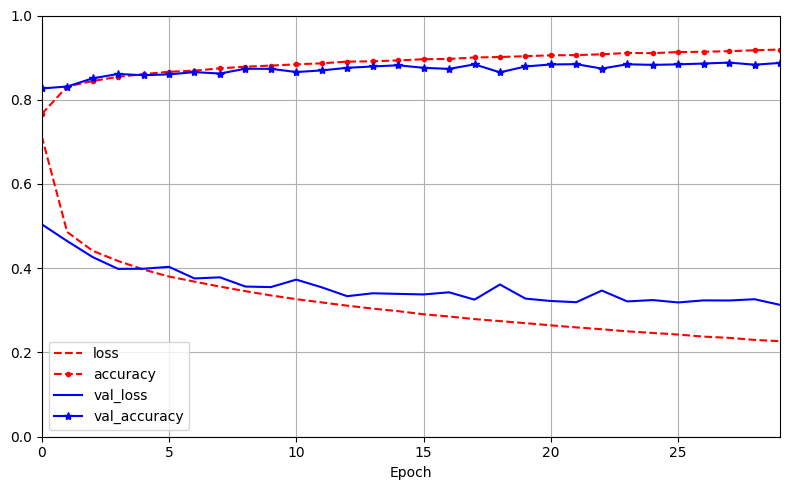

In [23]:
# PLotter l'historique
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  
save_fig("keras_learning_curves_plot")  
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8837


[0.3285600244998932, 0.8837000131607056]

In [28]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [29]:
# Regression avec Keras
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)


2025-01-26 18:17:30.905778: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


In [30]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

2025-01-26 18:17:49.490488: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-01-26 18:17:49.490524: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-01-26 18:17:49.491422: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


Epoch 1/20


2025-01-26 18:17:49.820205: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


 167/1719 [=>............................] - ETA: 4s - loss: 11.6757 - root_mean_squared_error: 3.4170

2025-01-26 18:17:50.881795: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-01-26 18:17:50.881829: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


 250/1719 [===>..........................] - ETA: 5s - loss: 10.8025 - root_mean_squared_error: 3.2867

2025-01-26 18:17:51.279137: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2025-01-26 18:17:51.302428: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2025-01-26 18:17:51.303371: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: my_logs/run_2025_01_26_18_16_29/plugins/profile/2025_01_26_18_17_51/honor-BBR-WAX9.xplane.pb


1719/1719 [==============================] - 6s 3ms/step - loss: 8.8822 - root_mean_squared_error: 2.9803 - val_loss: 8.5734 - val_root_mean_squared_error: 2.9282
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.3955 - root_mean_squared_error: 2.8975 - val_loss: 8.4822 - val_root_mean_squared_error: 2.9126
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 8.3359 - root_mean_squared_error: 2.8872 - val_loss: 8.4784 - val_root_mean_squared_error: 2.9119
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.3042 - root_mean_squared_error: 2.8817 - val_loss: 8.4301 - val_root_mean_squared_error: 2.9036
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2887 - root_mean_squared_error: 2.8790 - val_loss: 8.4089 - val_root_mean_squared_error: 2.9000
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2760 - root_mean_squared_error: 2.8768 - val_loss: 8.4026 - val

In [ ]:
# Lancer TensorBoard
# tensorboard --logdir=./my_logs --port=6006